In [1]:
import os
import numpy as np
import pandas as pd
import fitbit
import gather_keys_oauth2 as Oauth2
import datetime as dt
from datetime import datetime,date,time,timedelta
import time

# For now, I'm storing data as the raw json that gets
# retrieved through the API, and I'll figure out later
# in the analysis how to parse this out into time series
# data and summary/metadata
import json

In [2]:
# Gets authorization credentials - will pop open a browser
# window to get user authorization
with open('api_keys.json','r') as key_file:
    keys=json.loads(key_file.read())
CLIENT_ID,CLIENT_SECRET=[keys[i] for i in ('fitbit-client-id','fitbit-client-secret')]

server = Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN = str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN = str(server.fitbit.client.session.token['refresh_token'])

[10/Oct/2018:15:45:43] ENGINE Listening for SIGTERM.
[10/Oct/2018:15:45:43] ENGINE Listening for SIGHUP.
[10/Oct/2018:15:45:43] ENGINE Listening for SIGUSR1.
[10/Oct/2018:15:45:43] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[10/Oct/2018:15:45:43] ENGINE Started monitor thread 'Autoreloader'.
[10/Oct/2018:15:45:43] ENGINE Serving on http://127.0.0.1:8080
[10/Oct/2018:15:45:43] ENGINE Bus STARTED


127.0.0.1 - - [10/Oct/2018:15:45:44] "GET /?code=b8326b7586722d169d7273a57977481eb7cdb73d&state=7prTLsHJuiPJdUxXqmSHU2FVWPlGTO HTTP/1.1" 200 122 "" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"


[10/Oct/2018:15:45:45] ENGINE Bus STOPPING
[10/Oct/2018:15:45:50] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[10/Oct/2018:15:45:50] ENGINE Stopped thread 'Autoreloader'.
[10/Oct/2018:15:45:50] ENGINE Bus STOPPED
[10/Oct/2018:15:45:50] ENGINE Bus EXITING
[10/Oct/2018:15:45:50] ENGINE Bus EXITED
[10/Oct/2018:15:45:50] ENGINE Waiting for child threads to terminate...


In [4]:
# Creates the main Fitbit API object
client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, oauth2=True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

In [14]:
run1=json.load(open('data/heartrate/2018-07-28_hr.json','r'))
run1_time_series=run1['activities-heart-intraday']['dataset']
for entry in run1_time_series:
    t=dt.time(*map(int,entry['time'].split(':')))
    new_t=(datetime.combine(date(2018,6,30), t) - timedelta(hours=7,minutes=17,seconds=0)).time()
    entry['time']=new_t

run1_time_series = sorted(run1_time_series, key=lambda k: k['time']) 
run1_times=[i['time'] for i in run1_time_series]
run1_hrs=[i['value'] for i in run1_time_series]

run2=json.load(open('data/heartrate/2018-08-04_hr.json','r'))
run2_time_series=run2['activities-heart-intraday']['dataset']
for entry in run2_time_series:
    t=dt.time(*map(int,entry['time'].split(':')))
    new_t=(datetime.combine(date(2018,7,7), t) - timedelta(hours=6,minutes=17,seconds=0)).time()
    entry['time']=new_t

run2_time_series = sorted(run2_time_series, key=lambda k: k['time']) 
run2_times=[i['time'] for i in run2_time_series]
run2_hrs=[i['value'] for i in run2_time_series]

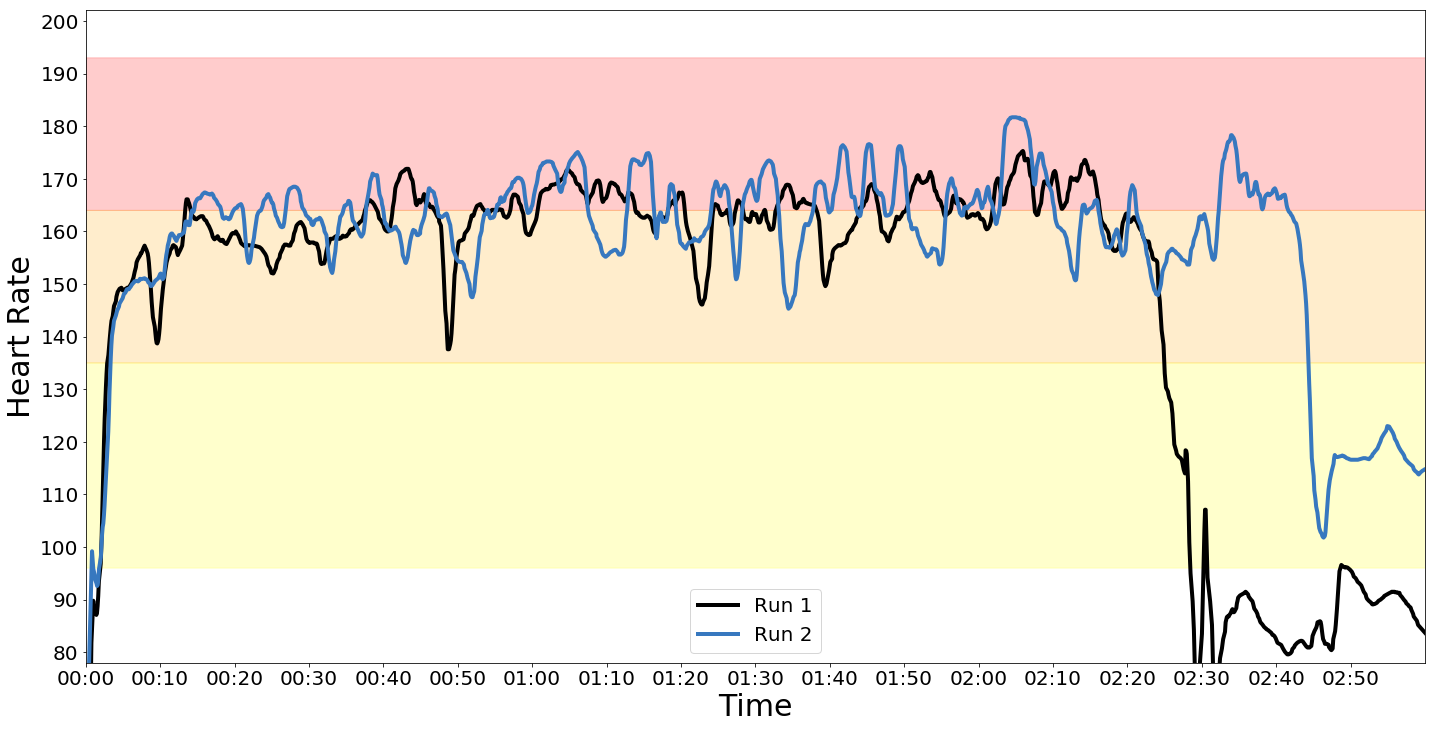

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sb
blue=sb.xkcd_palette(['windows blue'])[0]
amber=sb.xkcd_palette(['amber'])[0]

fig=plt.figure(figsize=(24,12),facecolor='w')
subplt=plt.subplot(111)

max_hr=193
peak=int(0.85*max_hr)
cardio=int(0.7*max_hr)
fat_burn=int(0.5*max_hr)

smth=10
subplt.plot(run1_times,np.convolve(run1_hrs, np.ones((smth,))/smth, mode='same'),'k-',linewidth=4,label='Run 1')
subplt.plot(run2_times,np.convolve(run2_hrs, np.ones((smth,))/smth, mode='same'),linestyle='-',color=blue,linewidth=4,label='Run 2')

#subplt.axhline(max_hr,color='r',linestyle='-')
subplt.fill_between(run2_times,peak,max_hr,color='r',alpha=0.2)
#subplt.axhline(peak,color='r',linestyle='-')
subplt.fill_between(run2_times,cardio,peak,color='orange',alpha=0.2)
#subplt.axhline(cardio,color='orange',linestyle='-')
subplt.fill_between(run2_times,fat_burn,cardio,color='yellow',alpha=0.2)
#subplt.axhline(fat_burn,color=amber,linestyle='-')

subplt.tick_params(axis='both',which='major',labelsize=20)

subplt.set_xlim(0,3.0*3600)
subplt.set_xticks([10*i*60 for i in range(18)])
subplt.set_xlabel('Time',fontsize=30)

subplt.set_ylim(78,202)
subplt.set_yticks(np.arange(80,210,10))
subplt.set_ylabel('Heart Rate',fontsize=30)
subplt.legend(loc=8,fontsize=20)

Text(0,0.5,'Heart Rate')

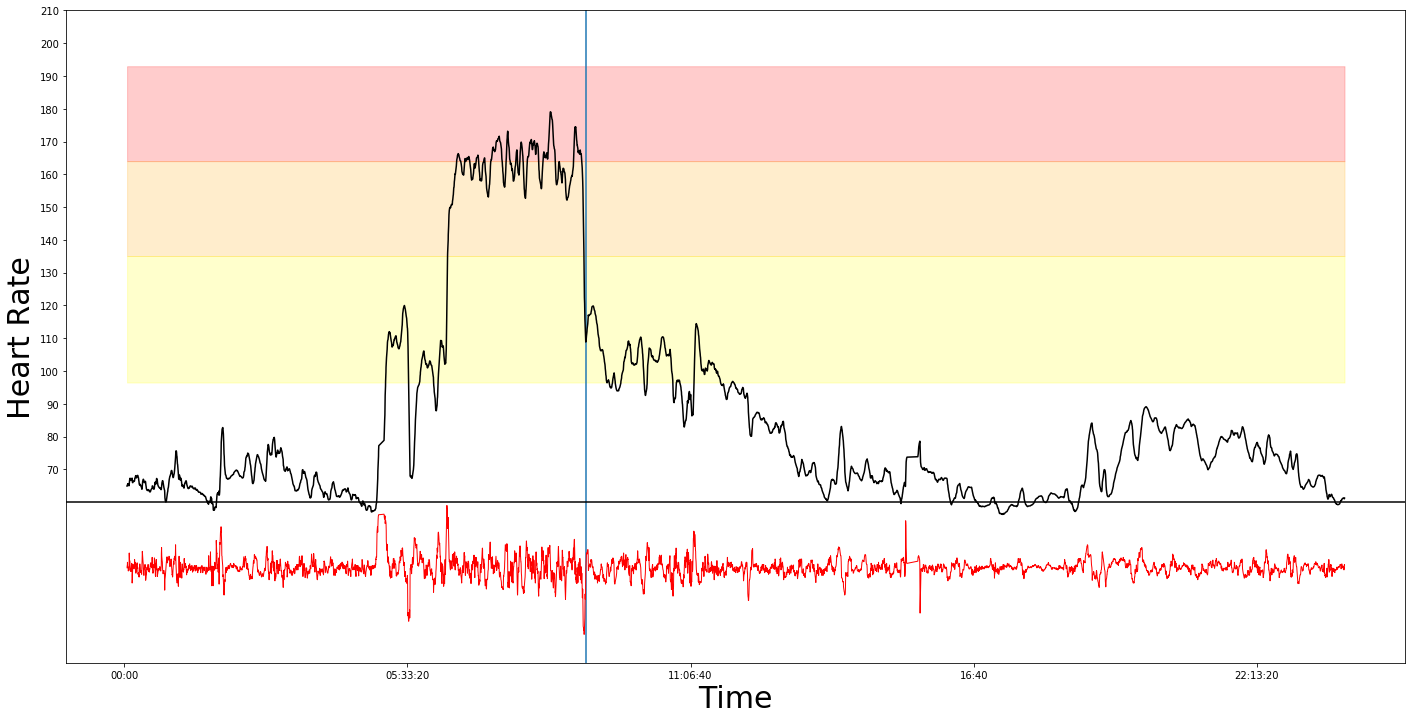

In [16]:
fig=plt.figure(figsize=(24,12),facecolor='w')
subplt=plt.subplot(111)

max_hr=193
peak=0.85*max_hr
cardio=0.7*max_hr
fat_burn=0.5*max_hr

run=json.load(open('data/heartrate/2018-08-04_hr.json','r'))
run_time_series=run['activities-heart-intraday']['dataset']
for entry in run_time_series:
    t=dt.time(*map(int,entry['time'].split(':')))
    new_t=(datetime.combine(date(2018,7,7), t) - timedelta(hours=0,minutes=0,seconds=0)).time()
    entry['time']=new_t
run_time_series = sorted(run_time_series, key=lambda k: k['time']) 
run_times=[i['time'] for i in run_time_series]
run_hrs=[i['value'] for i in run_time_series]

#idx=np.where([run_times[i]<dt.time(2,30,0) for i in range(len(run_times))])[0][-1]
times=run_times#[0:idx]
hrs=run_hrs#[0:idx]
smth=30
smoothed=np.convolve(hrs, np.ones((smth,))/smth,mode='same')
smoothed=smoothed[smth:]
times=times[smth:]
hrs=hrs[smth:]

grad=np.gradient(smoothed)
clipped_grad=np.clip(grad,-10,0)
times=times[0:-20]
smoothed=smoothed[0:-20]
grad=grad[0:-20]
clipped_grad=clipped_grad[0:-20]
mn=np.argmin(clipped_grad)
zeros=np.where(clipped_grad==0)[0]
stoptime=times[zeros[np.where(zeros>mn)[0][0]]]
subplt.axvline(stoptime)

subplt.plot(times,smoothed,'k-')
subplt.plot(times,10*grad+40,'r-',linewidth=1)

subplt.axhline(60,color='k')
subplt.fill_between(times,peak,max_hr,color='r',alpha=0.2)
subplt.fill_between(times,cardio,peak,color='orange',alpha=0.2)
subplt.fill_between(times,fat_burn,cardio,color='yellow',alpha=0.2)

#subplt.set_xlim(0,2.0*3600)
#subplt.set_xticks([10*i*60 for i in range(12)])
subplt.set_xlabel('Time',fontsize=30)

#subplt.set_ylim(78,202)
subplt.set_yticks(np.arange(70,220,10))
subplt.set_ylabel('Heart Rate',fontsize=30)

In [8]:
test=np.clip(smoothed,fat_burn,None)
act=[i for i in np.split(test, np.where(test==fat_burn)[0]) if len(i)>1]
act_times=[i for i in np.split(times, np.where(test==fat_burn)[0]) if len(i)>1]
act_log=zip(act_times,act)

acts=[]
for entry in act_log:
    time=entry[0]
    if(datetime.combine(date.today(),time[-1])-datetime.combine(date.today(),time[0])).total_seconds() > 15*60:
        acts.append(entry)
        
len(acts)

5

06:34:26
07:11:40
10:44:40
11:57:40
18:24:46


Text(0,0.5,'Heart Rate')

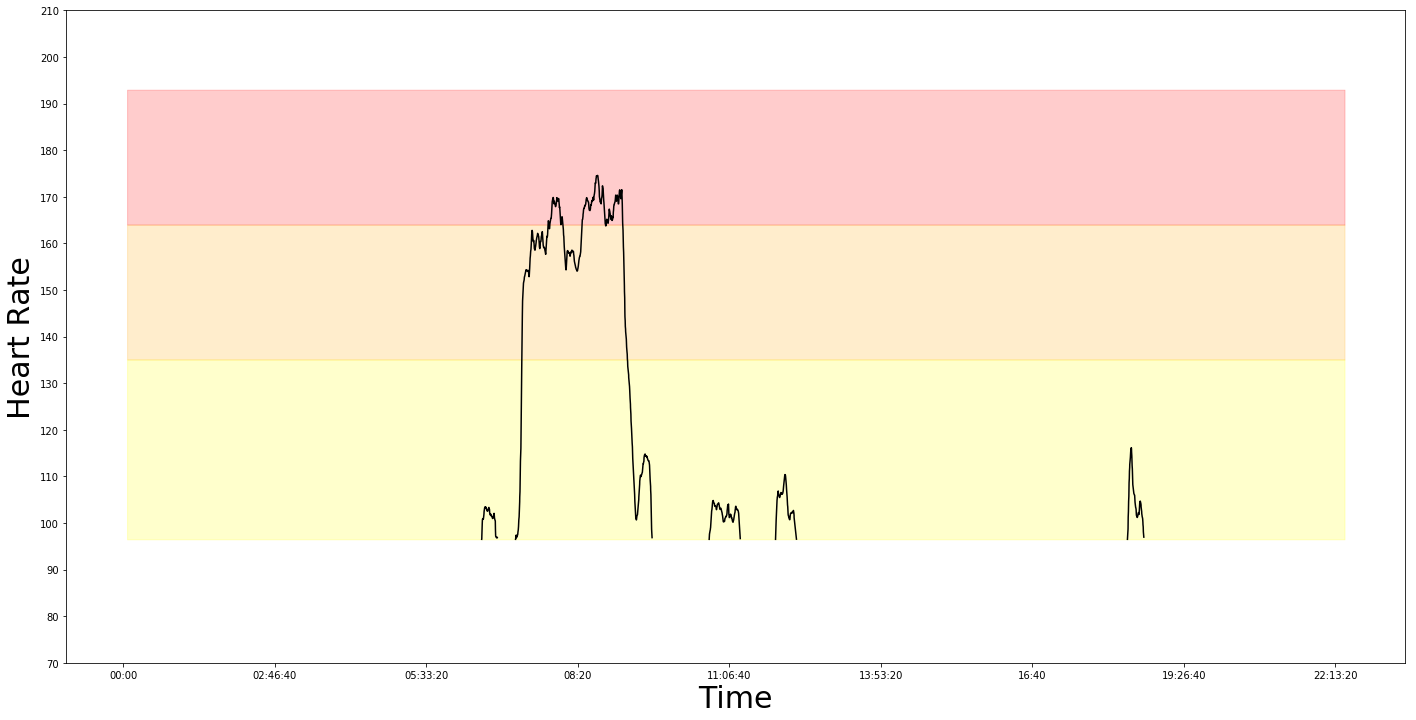

In [9]:
fig=plt.figure(figsize=(24,12),facecolor='w')
subplt=plt.subplot(111)

for act in acts:
    print(act[0][0])
    subplt.plot(act[0],act[1],'k-')
    
subplt.axhline(60,color='k')
subplt.fill_between(times,peak,max_hr,color='r',alpha=0.2)
subplt.fill_between(times,cardio,peak,color='orange',alpha=0.2)
subplt.fill_between(times,fat_burn,cardio,color='yellow',alpha=0.2)

#subplt.set_xlim(0,2.0*3600)
#subplt.set_xticks([10*i*60 for i in range(12)])
subplt.set_xlabel('Time',fontsize=30)

subplt.set_ylim(78,202)
subplt.set_yticks(np.arange(70,220,10))
subplt.set_ylabel('Heart Rate',fontsize=30)